# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: ** Este é um problema de classificação, pois irá classificar os estudantes em dois grupos: os que precisam de intervenção e os que não precisam

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [36]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [37]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [38]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


## Análise Gráfica

In [39]:
# TODO: Calcule o número de estudante
n_students = len(student_data)

# TODO: Calcule o número de atributos
n_features = len(student_data.columns)-1

# TODO: Calcule o número de alunos aprovados
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calcule o número de alunos reprovados
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calcule a taxa de graduação
grad_rate = float(n_passed)/n_students*100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [40]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [41]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))


Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [42]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.model_selection import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = num_test, random_state=42, stratify=y_all)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


In [43]:
print X_train.head(), y_train.head()

     school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  \
273          1          0      0      1   17          1          0   
265          1          0      0      1   18          1          0   
64           1          0      1      0   15          0          1   
131          1          0      1      0   15          0          1   
122          1          0      1      0   16          0          1   

     famsize_GT3  famsize_LE3  Pstatus_A    ...     higher  internet  \
273            1            0          0    ...          1         0   
265            0            1          1    ...          1         1   
64             0            1          0    ...          1         1   
131            1            0          0    ...          1         1   
122            0            1          0    ...          1         1   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  
273         1       3         5      2     2     2       1         2  
265 

In [44]:
print y_train[:3]

273    yes
265    yes
64     yes
Name: passed, dtype: object


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **

### **Modelo 1: Gaussian Naive Bayes**

1. **Aplicação**: detecção de spam em emails, cassificação de documentos, predição de palavras em um texto.

  * Referências: [Quora](https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used)
  
2. **Vantagens:** Simples e facil de implementar; mesmo que as premissas de independencia não sejam verdadeiras, na prática o modelo se sai bem; não precisa de muitos dados de treinamento; não é sensível a variáveis irrelevantes.

  * Referências: [Quora](https://www.quora.com/What-are-the-advantages-of-using-a-naive-Bayes-for-classification) [Echen](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/)
  
3. **Desvantagens: **Assume que as variáveis são independentes, o que pode não ser verdade nesse caso. Por exemplo, a variável _Absences_ pode depender da variável _Health_, uma vez que pessoas menos saudaveis podem ficar mais doentes e talvez faltar mais, ou a variável _Goout_ pode estar correlacionada com a _Freetime_, visto que quem tem mais tempo livre tende a sair mais.

  * Referências: [Quora](https://www.quora.com/What-are-the-disadvantages-of-using-a-naive-bayes-for-classification)
  
4. **Escolha:**: modelo de simples estruturação, que utiliza probabilidades e que apresenta bons resultados práticos
 


### **Modelo 2: SVM**  

1. **Aplicação**: Classificação de imagens, detecção de rostos, reconhecimento de letras escritas a mão.

  * Referências:[data-flair](https://data-flair.training/blogs/applications-of-svm/)
  
2. **Vantagens:** Método bom para fronteiras de decisão não-lineares; robusto contra _overfitting_, apresentando boa generalização, por possuir um parametro regularizador; treino relativamente fácil.

  * Referências: [Echen](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/),  [EliteDataScience](https://elitedatascience.com/machine-learning-algorithms#classification), [PDF](http://www.ijastnet.com/journals/Vol_7_No_2_June_2017/2.pdf), [Stack Exchange](https://stats.stackexchange.com/questions/24437/advantages-and-disadvantages-of-svm)
  
3. **Desvantagens: ** Dificuldade de interpretação em alguns casos, devido ao fato de ser um modelo não-paramétrico; É dependente de um bom kernel para fazer a separação. 

  * Referências:  [PDF](http://www.ijastnet.com/journals/Vol_7_No_2_June_2017/2.pdf), [Stack Exchange](https://stats.stackexchange.com/questions/24437/advantages-and-disadvantages-of-svm)
  
4. **Escolha:**: è um método muito popular atualmente, bastante utilizado e que apresenta ótimos resultados em problemas de classificação.

  
  

### **Modelo 3: Regressão logística** 

1. **Aplicação**: é aplicado em problemas de classificação binária, predições - a regressão logística permite obter a probabilidade de resultados, ajudando na tomada de decisão.
  * Referências: [UBC](https://www.stat.ubc.ca/~rollin/teach/536a/confEtc.html#(2))
  
2. **Vantagens:** O modelo não é sensível à correlação entre variáveis (como o Naive Bayes); ele oferece uma interpretação  probabilística e é bom para problemas de classificação.

  * Referências: [Echen](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/)
  
3. **Desvantagens: **  A regressão logística tende a não performar muito bem em fronteiras de decisão não-lineares e não são flexíveis o suficiente para entender relações complexas, além disso, é recomendável que as duas classificações possíveis estejam presentes em números iguais.

  * Referências: [EliteDataScience](https://elitedatascience.com/machine-learning-algorithms#classification)
  
4. **Escolha:**: É um modelo muito utilizado, bom para classificações binária, como esse problema (passou ou não passou) e baixo tempo de treinamento.

  
  

### [EXTRA] **Modelo 4: Árvores de decisão** 

1. **Aplicação**: Arvores de decisão são utilizadas na classificação de estrelas, filtração de ruídos de imagens, controle de sistemas não-lineares, diagnósticos médicos, entre outros.

  * Referências: [cbcb](http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html)
  
2. **Vantagens:** Fáceis de interpretar e explicar; São muito utilizados para problemas de classificação pois apresentam bons resultados, superando muitas vezes os outros métodos; Não necessitam de muito poder computacional; Não possuem muitos parâmetros.

  * Referências: [Echen](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/)
  
3. **Desvantagens: ** Tem tendências de apresentar _overfitting_; Não suportam online learning (o que não é o caso nesse projeto);

  * Referências: [EliteDataScience](https://elitedatascience.com/machine-learning-algorithms#classification)
  
4. **Escolha:**: Esse modelo foi um dos escolhidos por possuir várias aplicações e produzir bons resultados em problemas de classificação.



### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [45]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    return predict_labels(clf, X_test, y_test)

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [61]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn.naive_bayes import GaussianNB             #Naive Bayes
from sklearn.svm import SVC                            #SVM
from sklearn.linear_model import LogisticRegression    #Regrassão Logística
from sklearn import tree                               #Arvore de decisão

# TODO: Inicialize os três modelos
clf_A = GaussianNB()
clf_B = SVC(random_state = 21)
clf_C = LogisticRegression(random_state = 41)
clf_D = tree.DecisionTreeClassifier(random_state = 21)

Modelos = [clf_A, clf_B, clf_C, clf_D]

# TODO: Configure os tamanho dos conjuntos de treinamento
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]



In [62]:
# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)

xt = []
yt = []
zt = []

for modelo in Modelos:
    x = train_predict(modelo, X_train_100, y_train_100, X_test, y_test)
    xt.append(x)
    print " "
    
    y = train_predict(modelo, X_train_200, y_train_200, X_test, y_test)
    yt.append(y)
    print " "
    
    z = train_predict(modelo, X_train_300, y_train_300, X_test, y_test)
    zt.append(z)
    print " "
    
    print "-------------------------------------------------"
    


Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0040 segundos
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de treino: 0.7752.
As previsões foram feitas em 0.0040 segundos.
Pontuação F1 para o conjunto de teste: 0.6457.
As previsões foram feitas em 0.0000 segundos.
 
Treinando um GaussianNB com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0040 segundos
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de treino: 0.8060.
As previsões foram feitas em 0.0040 segundos.
Pontuação F1 para o conjunto de teste: 0.7218.
As previsões foram feitas em 0.0000 segundos.
 
Treinando um GaussianNB com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0040 segundos
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de treino: 0.8134.
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de teste: 0.7761.
As previsões foram feitas em 0.0000 segundo

In [48]:
print xt
print yt
print zt


[0.64566929133858275, 0.80254777070063688, 0.70676691729323315, 0.67213114754098358]
[0.72180451127819545, 0.8104575163398694, 0.73913043478260876, 0.70967741935483863]
[0.77611940298507476, 0.80519480519480513, 0.74999999999999989, 0.69999999999999996]


In [54]:
print 'Classificador 1 - Gaussian Naive Bayes'
print '100 pontos de treinamento - Pontuação F1 do teste : ', xt[0]
print '200 pontos de treinamento - Pontuação F1 do teste : ', yt[0]
print '300 pontos de treinamento - Pontuação F1 do teste : ', zt[0]
print '  '

print 'Classificador 2 - SVM'
print '100 pontos de treinamento - Pontuação F1 do teste : ', xt[1]
print '200 pontos de treinamento - Pontuação F1 do teste : ', yt[1]
print '300 pontos de treinamento - Pontuação F1 do teste : ', zt[1]
print '  '

print 'Classificador 3 - Logistic Regression'
print '100 pontos de treinamento - Pontuação F1 do teste : ', xt[2]
print '200 pontos de treinamento - Pontuação F1 do teste : ', yt[2]
print '300 pontos de treinamento - Pontuação F1 do teste : ', zt[2]
print '  '

print 'Classificador 4 - Decision Trees'
print '100 pontos de treinamento - Pontuação F1 do teste : ', xt[3]
print '200 pontos de treinamento - Pontuação F1 do teste : ', yt[3]
print '300 pontos de treinamento - Pontuação F1 do teste : ', zt[3]

Classificador 1 - Gaussian Naive Bayes
100 pontos de treinamento - Pontuação F1 do teste :  0.645669291339
200 pontos de treinamento - Pontuação F1 do teste :  0.721804511278
300 pontos de treinamento - Pontuação F1 do teste :  0.776119402985
  
Classificador 2 - SVM
100 pontos de treinamento - Pontuação F1 do teste :  0.802547770701
200 pontos de treinamento - Pontuação F1 do teste :  0.81045751634
300 pontos de treinamento - Pontuação F1 do teste :  0.805194805195
  
Classificador 3 - Logistic Regression
100 pontos de treinamento - Pontuação F1 do teste :  0.706766917293
200 pontos de treinamento - Pontuação F1 do teste :  0.739130434783
300 pontos de treinamento - Pontuação F1 do teste :  0.75
  
Classificador 4 - Decision Trees
100 pontos de treinamento - Pontuação F1 do teste :  0.672131147541
200 pontos de treinamento - Pontuação F1 do teste :  0.709677419355
300 pontos de treinamento - Pontuação F1 do teste :  0.7


[0.64566929133858275, 0.80254777070063688, 0.70676691729323315, 0.67213114754098358] [0.72180451127819545, 0.8104575163398694, 0.73913043478260876, 0.70967741935483863] [0.77611940298507476, 0.80519480519480513, 0.74999999999999989, 0.69999999999999996]


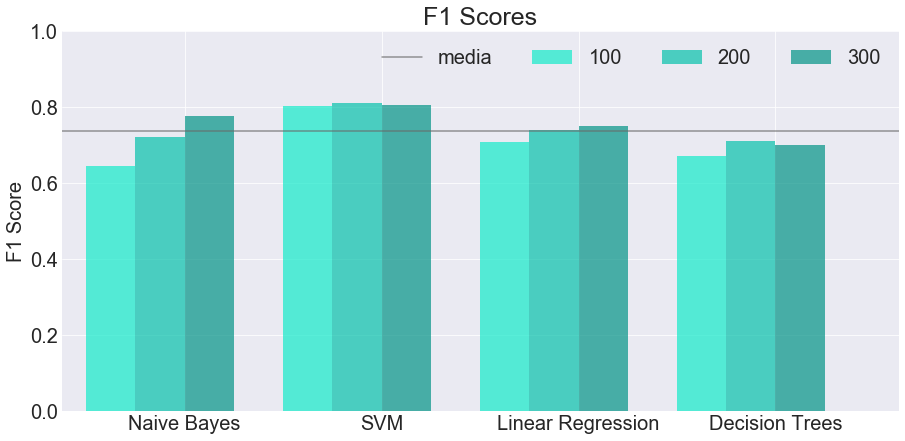

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("matriz_resultados_csv.csv")
df = df[['Tamanho','Modelo', 'F1_teste']].copy()

bar1 = xt
bar2 = yt
bar3 = zt

#for i in range(len(df['F1_teste']+1)):
    #if df.loc[i]['Tamanho'] == 100:
       # bar1.append(df.loc[i]['F1_teste'])
    #elif df.loc[i]['Tamanho'] == 200:
        #bar2.append(df.loc[i]['F1_teste'])
    #elif df.loc[i]['Tamanho'] == 300:
        #bar3.append(df.loc[i]['F1_teste'])   

print bar1, bar2 ,bar3

barWidth = 0.25      
        
# Setting the positions and width for the bars
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))
plt.style.use('seaborn-darkgrid')

# Create a bar with pre_score data,
# in position pos,
plt.bar(r1, 
        #using df['pre_score'] data,
        bar1, 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        #color='#EE3224',
        color = 'xkcd:aqua' ,
        # with label the first value in first_name
        label= '100') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar(r2, 
        #using df['mid_score'] data,
        bar2,
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        #color='#F78F1E',
        color = 'xkcd:turquoise' ,
        # with label the second value in first_name
        label= '200') 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar(r3, 
        #using df['post_score'] data,
        bar3, 
        # of width
        width, 
        # with alpha
        alpha=0.7, 
        # with color
        #color='#FFC222'
        color = 'xkcd:teal', 
        # with label the third value in first_name
        label='300') 

plt.axhline(y=np.mean(bar1 +bar2+ bar3), alpha = 0.7, color='dimgray')

# Set the y axis label
ax.set_ylabel('F1 Score', fontsize = 20)

# Set the chart's title
ax.set_title('F1 Scores', fontsize = 25)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in r1])

# Set the labels for the x ticks
ax.set_xticklabels(['Naive Bayes', 'SVM', 'Linear Regression', 'Decision Trees'], fontsize = 20)

# Set the grids
#ax.grid(linestyle='-', linewidth=2)

# Setting the x-axis and y-axis limits
plt.xlim(min(r1)-width, max(r1)+width*4)
plt.ylim(0,1)
plt.tick_params(labelsize=20)

# Adding the legend and showing the plot
plt.legend(['media','100', '200', '300'], loc='upper right', fontsize = 20, ncol=44)

plt.show()

#https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/
#

In [57]:
print zt[1]/zt[2]
print zt[1]/zt[0]

1.07359307359
1.03746253746


## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: ** 

O melhor modelo encontrado foi o **Naive Bayes**: Apesar de não ter obtido a maior pontuação F1, o método de Naive Bayes se mostrou rápido no processamento e indicou que um possível aumento no número de dados de treinamento resulte em uma pontuação cada vez maior, visto a progressão do valor da pontuação (ver gráfico acima). Além do baixo tempo de processamento, o método de Naive Bayes retorna para o usuário a probabilidade do evento acontecer, uma vantagem em relação ao método mais pontuado (SVM), que é não paramétrico e de difícil interpretação.



### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

 **Resposta: **  
 **[Naive Bayes]**: o método de Naive Bayes é um método de probabilidade condicional, ou seja, calcula a probabilidade do acontecimento de algo (nesse caso, a probabilidade de um aluno passar na matéria) dado que outra coisa ja aconteceu (as variáveis medidas de cada aluno). Para o cálculo do algoritmo, este pressupõe que as variáveis sejam idependentes, ou seja, uma não tem relação e nem influencia a outra (nesse caso, algumas variáveis são dependentes, como por exemplo o tempo livre e o número de vezes que a pessoa sai: quanto mais tempo livre, mais se espera que uma pessoa saia ou faça outra coisa). Na pratica, esse algoritmo se sai bem mesmo quando existe relação entre as variáveis. Depois de determinadas as probabilidades de acontecimento de cada atributo, a estimativa é feita por meio de relações do cálculo da regra de Bayes e o resultado final informa a probabilidade do acontecimento estudado (passar na matéria) acontecer.
 
**[Antigo - Regressão Logística]**: Primeiramente, o modelo de regressão logística serve para classificações do tipo "Sim" e "Não", 0 ou 1, ou seja, serve para dizer se algo está em um grupo ou em outro. Como é possivel observar na imagem abaixo, os conjuntos de pontos estão distribuidos em duas linhas horizontais (só existem dois valores para o eixo _y_ do gráfico). Diferentemente da regressão linear, que busca ajustar uma linha aos pontos e, nesse caso falha, a regressão logistica tem uma curva do tipo "_S_" e se "acomoda" muito melhor aos dados, prevendo melhor qual sera a classificação dado o valor da variavel _x_. Também, como possui um valor entre 0 e 1, comporta-se como uma probabilidade, que tem seu valor obtido no eixo _y_ do gráfico.
 
<img src="img/linear_logistic.jpg" width="600"/>

O modelo é treinado buscando o melhor ajute da função logística aos pontos. Depois de treinado, ao se colocar valores novos dentro do modelo, ele terá como resposta um valor de probabilidade entre 0 e 1 (nesse caso, 1= passou e 0 = não passou), qualquer valor entre 0 e 1 mostra uma _incerteza_ quanto ao destino do aluno e representa a probabilidade dele _passar_ na matéria.




### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [50]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.metrics import make_scorer 
from sklearn.grid_search import  GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import StratifiedShuffleSplit

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'saga'), 
              'C':[ 0.01, 0.1, 1.0, 10, 100], 
              'max_iter':[50, 100, 400, 700]}

# TODO: Inicialize o classificador
#clf = SVC(random_state = 41)
clf = LogisticRegression()

X_train_n = preprocessing.normalize(X_train, norm='l1')
X_test_n = preprocessing.normalize(X_test, norm='l1')


# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')


# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(estimator = clf, 
                        param_grid = parameters, 
                        scoring = f1_scorer,
                        cv = StratifiedShuffleSplit(y_train,n_iter = 50,random_state = 42))

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj = grid_obj.fit(X_train_n, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train_n, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test_n, y_test))
print clf

print " "

l_r = LogisticRegression( random_state = 21 )
train_predict( l_r, X_train_n, y_train, X_test_n, y_test)
print l_r


As previsões foram feitas em 0.0000 segundos.
O modelo calibrado tem F1 de 0.8365 no conjunto de treinamento.
As previsões foram feitas em 0.0000 segundos.
O modelo calibrado tem F1 de 0.8079 no conjunto de teste.
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=21, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
 
Treinando um LogisticRegression com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0000 segundos
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de treino: 0.8024.
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de teste: 0.8050.
As previsões foram feitas em 0.0000 segundos.
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random

In [51]:
from collections import Counter
y_test.describe()

x = Counter(y_test)
y = Counter(y_train)


print x['yes']/x['no'] , y['yes']/y['no']



2 2


Text(0.5,28.5,u'Predicted')

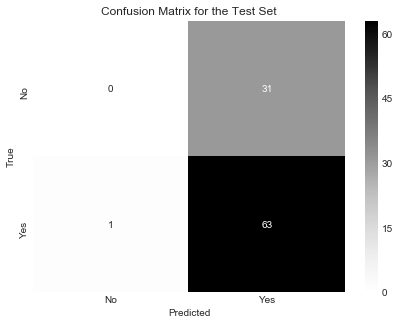

In [52]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

Treinando um GaussianNB com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0000 segundos
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de treino: 0.8068.
As previsões foram feitas em 0.0000 segundos.
Pontuação F1 para o conjunto de teste: 0.7669.
As previsões foram feitas em 0.0040 segundos.
GaussianNB(priors=None)


Text(0.5,28.5,u'Predicted')

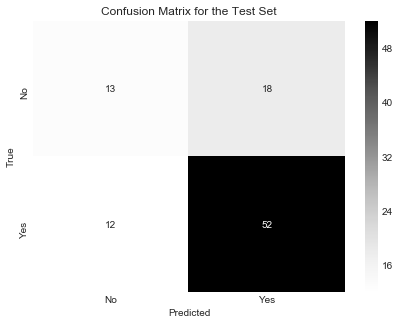

In [59]:
GNB = GaussianNB()
train_predict( GNB, X_train_n, y_train, X_test_n, y_test)
print GNB

cm_test_b = confusion_matrix(y_test, GNB.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: ** Como o modelo de Naive Bayes não possui variáveis para calibração, a não ser as probabilidades a priori (que não podem ser buscadas por matriz porque não são variáveis de otimização), não foi possível calibrar o modelo, que teve um F1 score igual a 0,7669. O segundo melhor modelo que retorna probabilidade (Regressão Linear) possui variáveis de otimização que podem ser calibradas, então foi realizada uma busca por matriz nesse modelo. Antes da busca, com os parâmetros em default, o F1 score obtido foi de 0,8050 e após a busca em matriz foi de 0,8079. O resultado da Regressão Logística sem calibração das variáveis obtido anteriormente (apresentado no gráfico de comparação entre os modelos), obteve um score menor do que o não calibrado obtido na célula [50], pois neste último foi realizada uma estratificação dos conjuntos de treino e teste para possuirem a mesma proporção de variáveis alvo e também pois o conjunto de treino foi normalizado, o que melhora o desempenho desse algoritmo.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.